In [167]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('science')
plt.rcParams['text.usetex'] = True
#import seaborn; seaborn.set()
import astropy.io.fits as fits
from astropy.io import ascii
from astropy.table import Table
import scipy.stats as stats
import os
import re
from pandas import DataFrame
import pandas as pd
import sys
# 定义颜色
colors = {
    'red': '#E24A33',
    'blue': '#348ABD',
    'green': '#8EBA42',
    'orange': '#FBC15E',
    'purple': '#988ED5',
    'pink': '#FFB5B8',
    'gray': '#777777'
}

# Given values
a = 7.57e-15 # erg cm^-3 K^-4
M_star = 1.4  # Solar masses
M_0 = M_star * 1.989e33  # g (1.4 times the mass of the sun)
R_star_km = 10  # km
R_star_cm = R_star_km * 1e5  # Convert to cm
L_X_norm = 10**37  # erg/s
# Flux changes
D_kpc = 2
kpc_to_cm = 3.086e21  # 1 kpc = 3.086 x 10^21 cm
D_cm = D_kpc * kpc_to_cm  # 转换为厘米
E_0 = 50.0
B_star = E_0*1e12/11.6
m_p = 1.67e-24  # g
G = 6.674e-8  # cm^3 g^-1 s^-2
sigma_T = 6.65e-25  # cm^2
c = 3e10  # cm/s


X = np.array([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95])
x_data=np.hstack([X,X+1])
X_err=np.array([0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05])
x_err=np.hstack([X_err,X_err])

L_X1 = 4 * np.pi * D_cm**2 * np.array([2.23187568e-07, 2.24786383e-07, 2.29879371e-07, 2.39916435e-07,
       2.48582184e-07, 2.49419268e-07, 2.43304421e-07, 2.37235676e-07,
       2.35217701e-07, 2.28444128e-07])
E_cyc_obs1=np.array([46.7069, 45.4768, 42.5435, 40.4825, 40.1051, 39.6875, 41.9164,
       44.3874, 46.6217, 47.0869])
E_cyc_obs1_err=[np.array([0.39  , 0.7508, 0.5476, 0.6376, 1.3202, 0.4741, 0.7096, 0.6309,
       0.8281, 0.4714]), np.array([0.4239, 0.8707, 0.7481, 0.7042, 0.7574, 0.5779, 0.8007, 0.4619,
       0.3139, 0.3005])]

L_X2 = 4 * np.pi * D_cm**2 * np.array([8.40814127e-08, 8.53257275e-08, 8.72609627e-08, 9.49183106e-08,
       9.70331209e-08, 9.63052582e-08, 9.28709739e-08, 8.94334532e-08,
       8.66024144e-08, 8.48613624e-08])
E_cyc_obs2=np.array([49.2479, 49.3045, 48.1532, 47.439 , 45.8961, 46.1403, 47.3092,
       48.3685, 48.9202, 49.4778])
E_cyc_obs2_err=[np.array([0.3489, 0.4962, 0.7493, 0.8177, 1.1308, 0.8375, 1.242 , 0.5579,
       0.5402, 0.3217]), np.array([0.8305, 0.9564, 1.0674, 1.0816, 1.4729, 0.8511, 0.3772, 0.6721,
       0.784 , 0.5636])]

L_X3 = 4 * np.pi * D_cm**2 * np.array([4.87730596e-08, 4.85489677e-08, 5.06174194e-08, 5.50249935e-08,
       5.76886001e-08, 5.71018265e-08, 5.34293634e-08, 5.25097560e-08,
       5.17547244e-08, 5.02423564e-08])
E_cyc_obs3=np.array([48.9137, 48.3472, 46.6604, 45.9283, 44.6995, 44.9977, 45.8974,
       47.8083, 48.324 , 49.2527])
E_cyc_obs3_err=[np.array([0.3048, 0.7473, 0.8494, 1.2974, 1.0544, 1.0421, 0.9953, 0.7382,
       0.2997, 0.5879]), np.array([1.2366, 1.2257, 0.5692, 0.8881, 0.6427, 1.1798, 0.5765, 0.856 ,
       0.4815, 0.9558])]

0.03482333641519568
47.1192440822713 47.08292000000001


Text(0.5, 0, 'Phase')

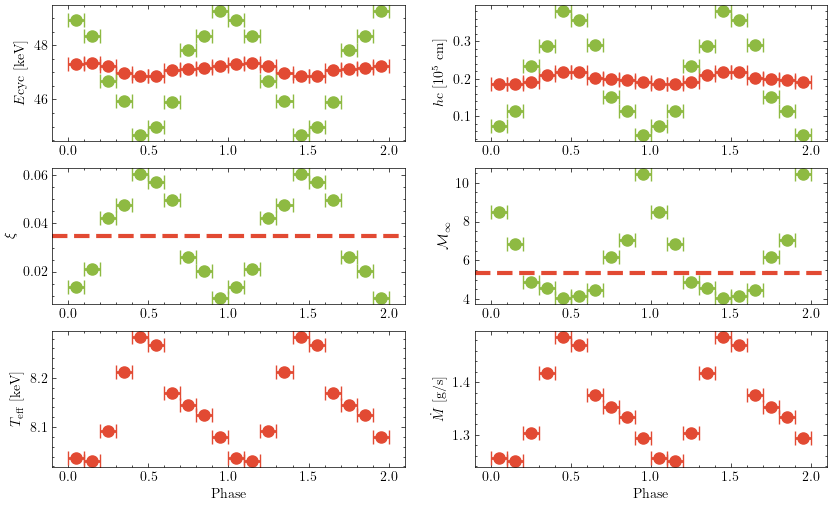

In [235]:
L_X = L_X3
E_cyc_obs = E_cyc_obs3


# Calculate h_s using the given formula
E_0 = 50
xi = 0.08

h_s = 2.28e3 * (xi / 0.01) * (M_star / 1.4)**(-1) * (R_star_cm / 10**6) * (L_X / L_X_norm) #super-critical
E_cyc = E_0 * (R_star_cm / (R_star_cm + h_s))**3

# Calculate h_s using the given formula
h_s_obs = R_star_cm * ((E_0 / E_cyc_obs)**(1/3) - 1)
H_obs = 1.14e5 * (M_star / 1.4)**-1 * (R_star_cm / 10**6) * (L_X / L_X_norm)
xi_obs = xi * h_s_obs / h_s
xi = np.mean(xi_obs)
print(xi)
h_s = 2.28e3 * (xi / 0.01) * (M_star / 1.4)**(-1) * (R_star_cm / 10**6) * (L_X / L_X_norm) #super-critical
E_cyc = E_0 * (R_star_cm / (R_star_cm + h_s))**3

Mach_obs = (xi_obs)**(-1/2)
T_eff = 4.35e7 * (Lambda/0.1)**(1/4) * (M_star/1.4)**(-5/56) * (R_star_cm/1e6)**(-15/56) * (B_star/1e12)**(1/7) * (L_X/1e37)**(5/28)
r_0 = 1.93e5 * (Lambda/0.1)**(-1/2) * (M_star/1.4)**(-1/14) * (R_star_cm/1e6)**(11/14) * (B_star/1e12)**(-2/7) * (L_X/1e37)**(1/7)
dot_M = L_X * R_star_cm / (G * M_0)
P_rad = a * T_eff**4 / 3 

print(np.mean(E_cyc),np.mean(E_cyc_obs))


fig, axs = plt.subplots(3, 2, figsize=(10, 6))
axs[0,0].errorbar(x_data, np.hstack([E_cyc,E_cyc]), xerr=x_err, 
             fmt='o', color=colors['red'], ecolor=colors['red'], capsize=5, markersize=8, elinewidth=2)
axs[0,0].errorbar(x_data, np.hstack([E_cyc_obs,E_cyc_obs]), xerr=x_err, 
             fmt='o', color=colors['green'], ecolor=colors['green'], capsize=5, markersize=8, elinewidth=2)
axs[0,0].set_ylabel(r'$E{\rm cyc}$ [keV]')

axs[0,1].errorbar(x_data, np.hstack([h_s,h_s])/1e5, xerr=x_err, 
             fmt='o', color=colors['red'], ecolor=colors['red'], capsize=5, markersize=8, elinewidth=2)
axs[0,1].errorbar(x_data, np.hstack([h_s_obs,h_s_obs])/1e5, xerr=x_err, 
             fmt='o', color=colors['green'], ecolor=colors['green'], capsize=5, markersize=8, elinewidth=2)
axs[0,1].set_ylabel(r'$h{\rm c}$ [$10^5$ cm]')

axs[1,0].axhline(y=xi, color=colors['red'], linestyle='--',lw=3,label=r'\xi_{\rm mean}: %s'%xi)
axs[1,0].errorbar(x_data, np.hstack([xi_obs,xi_obs]), xerr=x_err, 
             fmt='o', color=colors['green'], ecolor=colors['green'], capsize=5, markersize=8, elinewidth=2)
axs[1,0].set_ylabel(r'$\xi$')

axs[1,1].axhline(y=xi**(-1/2), color=colors['red'], linestyle='--',lw=3)
axs[1,1].errorbar(x_data, np.hstack([Mach_obs,Mach_obs]), xerr=x_err, 
             fmt='o', color=colors['green'], ecolor=colors['green'], capsize=5, markersize=8, elinewidth=2)
axs[1,1].set_ylabel(r'$\mathcal{M}_{\infty}$')

axs[2,0].errorbar(x_data, np.hstack([T_eff,T_eff])*8.62e-8, xerr=x_err, 
             fmt='o', color=colors['red'], ecolor=colors['red'], capsize=5, markersize=8, elinewidth=2)
axs[2,0].set_ylabel(r'$T_{\rm eff}$ [keV]')

axs[2,1].errorbar(x_data, np.hstack([dot_M,dot_M])/1e17, xerr=x_err, 
             fmt='o', color=colors['red'], ecolor=colors['red'], capsize=5, markersize=8, elinewidth=2)
axs[2,1].set_ylabel(r'$\dot{M}$ [g/s]')
x`x`
axs[2,0].set_xlabel(r'Phase')
axs[2,1].set_xlabel(r'Phase')
# axs[3,0].errorbar(x_data, np.hstack([P_rad,P_rad])/1e17, xerr=x_err, 
#              fmt='o', color=colors['red'], ecolor=colors['red'], capsize=5, markersize=8, elinewidth=2)
# axs[3,0].set_ylabel(r'$P_{\rm rad}$ [dyne/cm$^2$]')

#plt.savefig('/Users/kldsky/Desktop/1A0535_results/column_radiation_20201213.pdf')




Text(0, 0.5, '$\\tau_{\\rm \\star}$')

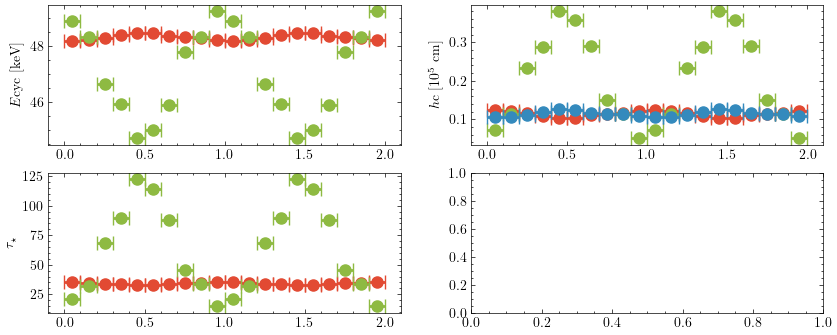

In [202]:
# Calculate h_s using the given formula
L_X = L_X3
E_cyc_obs = E_cyc_obs3
xi = 0.02
h_s = 2.28e3 * (xi / 0.01) * (M_star / 1.4)**(-1) * (R_star_cm / 10**6) * (L_X / L_X_norm) #super-critical
Lambda = 0.5
B_star = E_0*1e12/11.6
m_e = 9.10938356e-28 # g
v_ff = np.sqrt(2 * G * M_0 / R_star_cm)
n_max = m_e * v_ff**2 / (2 * E_cyc_obs * 1.6e-9)
tau_star = 51.4 * (M_star / 1.4)**2 * (R_star_cm / 1e6)**(-2) * (1/np.log(2*n_max))
h_c = 1.48e5 * (Lambda / 0.1)**(-1) * (tau_star / 20) * (M_star / 1.4)**(19/14) * (R_star_cm / 1e6)**(1/14) * (B_star / 1e12)**(-4/7) * (L_X / L_X_norm)**(-5/7)
h_s = 2.28e3 * (xi / 0.01) * (M_star / 1.4)**(-1) * (R_star_cm / 10**6) * (L_X / L_X_norm) #super-critical



E_cyc = E_0 * (R_star_cm / (R_star_cm + h_c))**3

# Calculate h_s using the given formula
h_obs = R_star_cm * ((E_0 / E_cyc_obs)**(1/3) - 1)

tau_star_obs = h_obs * tau_star / h_c

#h_c_obs = 1.48e5 * (Lambda / 0.1)**(-1) * (tau_star / 20) * (M_star / 1.4)**(19/14) * (R_star_cm / 1e6)**(1/14) * (B_star / 1e12)**(-4/7) * (L_X / L_X_norm)**(-5/7)
fig, axs = plt.subplots(2, 2, figsize=(10, 4))
axs[0,0].errorbar(x_data, np.hstack([E_cyc,E_cyc]), xerr=x_err, 
             fmt='o', color=colors['red'], ecolor=colors['red'], capsize=5, markersize=8, elinewidth=2)
axs[0,0].errorbar(x_data, np.hstack([E_cyc_obs,E_cyc_obs]), xerr=x_err, 
             fmt='o', color=colors['green'], ecolor=colors['green'], capsize=5, markersize=8, elinewidth=2)

axs[0,0].set_ylabel(r'$E{\rm cyc}$ [keV]')

axs[0,1].errorbar(x_data, np.hstack([h_c,h_c])/1e5, xerr=x_err, 
             fmt='o', color=colors['red'], ecolor=colors['red'], capsize=5, markersize=8, elinewidth=2)
axs[0,1].errorbar(x_data, np.hstack([h_obs,h_obs])/1e5, xerr=x_err, 
             fmt='o', color=colors['green'], ecolor=colors['green'], capsize=5, markersize=8, elinewidth=2)
axs[0,1].errorbar(x_data, np.hstack([h_s,h_s])/1e5, xerr=x_err, 
             fmt='o', color=colors['blue'], ecolor=colors['blue'], capsize=5, markersize=8, elinewidth=2)
axs[0,1].set_ylabel(r'$h{\rm c}$ [$10^5$ cm]')

axs[1,0].errorbar(x_data, np.hstack([tau_star,tau_star]), xerr=x_err, 
             fmt='o', color=colors['red'], ecolor=colors['red'], capsize=5, markersize=8, elinewidth=2)
axs[1,0].errorbar(x_data, np.hstack([tau_star_obs,tau_star_obs]), xerr=x_err, 
             fmt='o', color=colors['green'], ecolor=colors['green'], capsize=5, markersize=8, elinewidth=2)

axs[1,0].set_ylabel(r'$\tau_{\rm \star}$')

